In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
sales_train = pd.read_csv('sales_train.csv')
sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [6]:
sales_train.date = pd.to_datetime(sales_train.date)

In [31]:
dates=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')

In [33]:
monthly_shop_sales=sales_train.groupby(["date_block_num","shop_id"])["item_cnt_day"].sum()
# get the shops to the columns
monthly_shop_sales=monthly_shop_sales.unstack(level=1)
monthly_shop_sales=monthly_shop_sales.fillna(0)
monthly_shop_sales.index=dates
monthly_shop_sales=monthly_shop_sales.reset_index()
monthly_shop_sales.head()

shop_id,index,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,2013-01-01,5578.0,2947.0,1146.0,767.0,2114.0,0.0,3686.0,2495.0,1463.0,...,3406.0,2748.0,1812.0,2055.0,9386.0,0.0,3238.0,0.0,0.0,2017.0
1,2013-02-01,6127.0,3364.0,488.0,798.0,2025.0,877.0,4007.0,2513.0,1156.0,...,3054.0,2284.0,1737.0,1906.0,8075.0,0.0,2655.0,0.0,0.0,1897.0
2,2013-03-01,0.0,0.0,753.0,959.0,2060.0,1355.0,4519.0,2460.0,977.0,...,3610.0,2605.0,2034.0,2365.0,9488.0,0.0,3099.0,6586.0,3773.0,2028.0
3,2013-04-01,0.0,0.0,583.0,647.0,285.0,1008.0,3168.0,1540.0,-1.0,...,2740.0,1945.0,1446.0,1515.0,6726.0,0.0,2153.0,5493.0,2831.0,1388.0
4,2013-05-01,0.0,0.0,553.0,710.0,1211.0,1110.0,3022.0,1647.0,0.0,...,2839.0,2243.0,1482.0,1767.0,7006.0,852.0,2140.0,5233.0,2308.0,1374.0


In [34]:
shop1 = monthly_shop_sales[['index',31]]
shop1.columns = shop1.columns.astype(str)
shop1.columns = shop1.columns.str.replace('index','date',).str.replace('31','shop1')
shop1.head()

shop_id,date,shop1
0,2013-01-01,10173.0
1,2013-02-01,11160.0
2,2013-03-01,12670.0
3,2013-04-01,9621.0
4,2013-05-01,9423.0


In [35]:
shop1.index=pd.date_range(start = '2013-01-01',end='2015-10-01', freq = 'MS')
shop1.head()

shop_id,date,shop1
2013-01-01,2013-01-01,10173.0
2013-02-01,2013-02-01,11160.0
2013-03-01,2013-03-01,12670.0
2013-04-01,2013-04-01,9621.0
2013-05-01,2013-05-01,9423.0


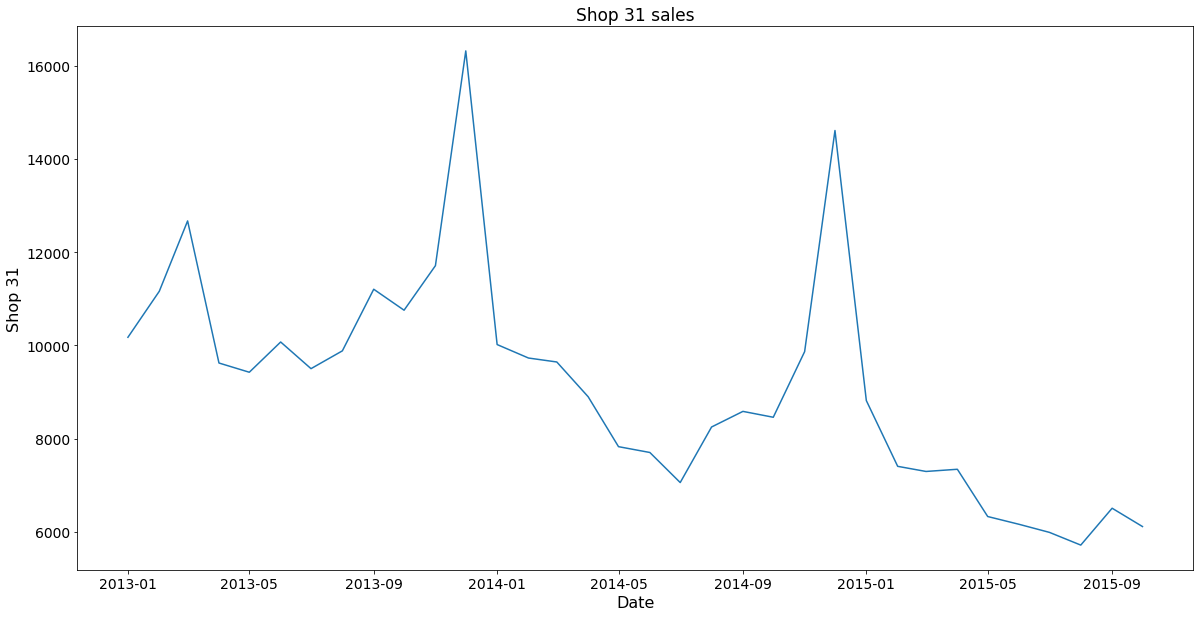

In [94]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.lineplot(x="date", y="shop1", data=shop1)
plt.title('Shop 31 sales', fontsize=17)
plt.xlabel('Date',fontsize=16)
plt.xticks(fontsize = 14)
plt.ylabel('Shop 31',fontsize=16)
plt.yticks(fontsize = 14)
plt.show()

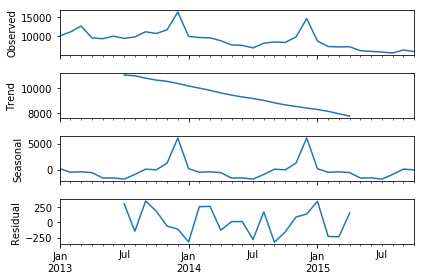

In [39]:
#12 months
res = sm.tsa.seasonal_decompose(shop1.shop1,freq=12,model="additive")
resplot = res.plot()

In [223]:
from statsmodels.tsa.seasonal import seasonal_decompose
result_add=seasonal_decompose(shop1.shop1, model='additive', extrapolate_trend='freq')
#result_add.resid

2013-01-01   -1505.962121
2013-02-01    -278.417347
2013-03-01     779.655206
2013-04-01   -1040.188908
2013-05-01    -457.339128
2013-06-01      83.842301
2013-07-01      53.758418
2013-08-01     -51.799372
2013-09-01     464.128950
2013-10-01     338.057271
2013-11-01    -167.139342
2013-12-01    -216.306009
2014-01-01     282.688714
2014-02-01     239.812160
2014-03-01    -284.161616
2014-04-01     239.572941
2014-05-01     -42.331941
2014-06-01    -291.446840
2014-07-01    -525.324916
2014-08-01     259.867295
2014-09-01    -202.287717
2014-10-01       2.057271
2014-11-01     -20.556009
2014-12-01      28.610658
2015-01-01     941.730381
2015-02-01    -242.937840
2015-03-01    -777.036616
2015-04-01     519.072941
2015-05-01     218.128043
2015-06-01     -73.938487
2015-07-01     190.023472
2015-08-01    -489.610949
2015-09-01    -543.384259
2015-10-01    -621.657569
Freq: MS, Name: shop1, dtype: float64

from statsmodels.tsa.statespace.sarimax import SARIMAX

model2 = SARIMAX(shop1.set_index('date'))
model2

model2_fit = model2.fit()

yhat = model2_fit.get_forecast(steps=6)
yhat.predicted_mean.plot()
plt.show()

# Time series forecasting with ARIMA

In [40]:
shop = shop1.set_index('date')

In [71]:
import itertools
p = d = q = range(0, 1)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[1], 12) for x in list(itertools.product(p, d, q))]

In [72]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(shop1.shop1,order=param,seasonal_order=param_seasonal,
                                        enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:699.5809860191692


In [55]:
def pdqseasonalpqd():
    p = d = q = range(0, 1)
    pdq = list(itertools.product(p, d, q))    
    seasonal_pdq = [(x[0], x[1],x[1], 12) for x in list(itertools.product(p, q))]
    return pdq, seasonal_pdq

In [68]:
pdqseasonalpqd()

([(0, 0, 0)], [(0, 0, 0, 12)])

In [57]:
def bestparams(y):
    param_list=[]
    aic_list=[]
    pdq, seasonal_pdq = pdqseasonalpqd()
    for param in pdq:
        mod = sm.tsa.statespace.SARIMAX(y,
                                       order=param,
                                       trend='c')
        results = mod.fit()
        param_list.append([param,param_seasonal,results.aic])
        aic_list.append(results.aic)

    best_params=[param_list[i] for i in range(len(param_list)) if min(aic_list) == param_list[i][2]  ][0]
    print(f'AICs range from {min(aic_list)} to {max(aic_list)}')
    print(f'The best parameters,\nin the format [(pdq),(seasonal pdq), AIC ]\nwith the lowest AIC, are: {best_params}.')
    return

In [58]:
bestparams(shop1.shop1)

AICs range from 628.7885697059376 to 628.7885697059376
The best parameters,
in the format [(pdq),(seasonal pdq), AIC ]
with the lowest AIC, are: [(0, 0, 0), (0, 0, 0, 12), 628.7885697059376].


In [489]:
bestparams(shop1.shop1)

AICs range from 615.2050241893169 to 628.7885697059376
The best parameters,
in the format [(pdq),(seasonal pdq), AIC ]
with the lowest AIC, are: [(1, 0, 0), (0, 0, 0, 12), 615.2050241893169].


In [81]:
mod2 = sm.tsa.statespace.SARIMAX(shop1.shop1,
                                order=(1, 0, 0),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod2.fit()

In [395]:
#mod = sm.tsa.statespace.SARIMAX(result_add.resid,order=(1, 0, 1))

In [62]:
#results = mod2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                  shop1   No. Observations:                   34
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -298.558
Date:                Thu, 11 Jul 2019   AIC                            601.116
Time:                        17:56:23   BIC                            604.110
Sample:                    01-01-2013   HQIC                           602.124
                         - 10-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9651      0.029     33.393      0.000       0.908       1.022
sigma2      4.225e+06   7.27e+05      5.813      0.000     2.8e+06    5.65e+06
===================================================================================
Ljung-Box (Q):                       35.12   Jarque-Bera (JB):                12.29
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               1.31   Skew:                            -0.54
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

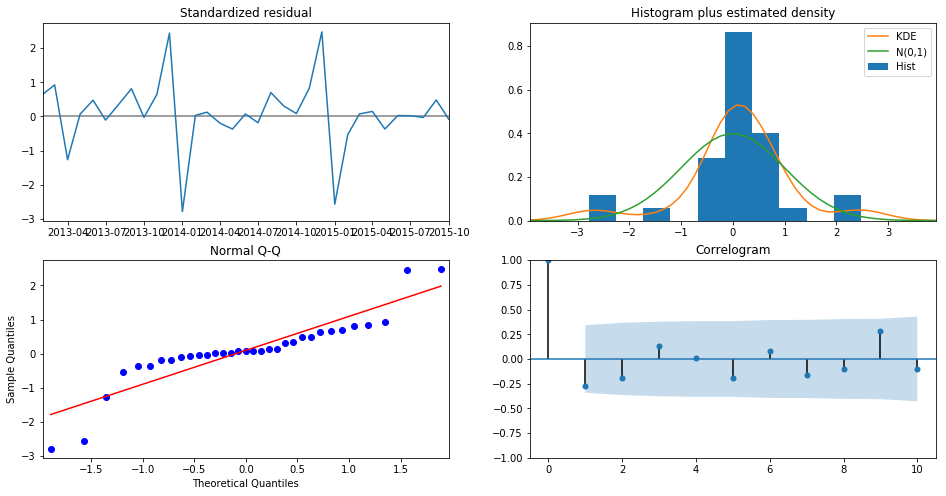

In [44]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

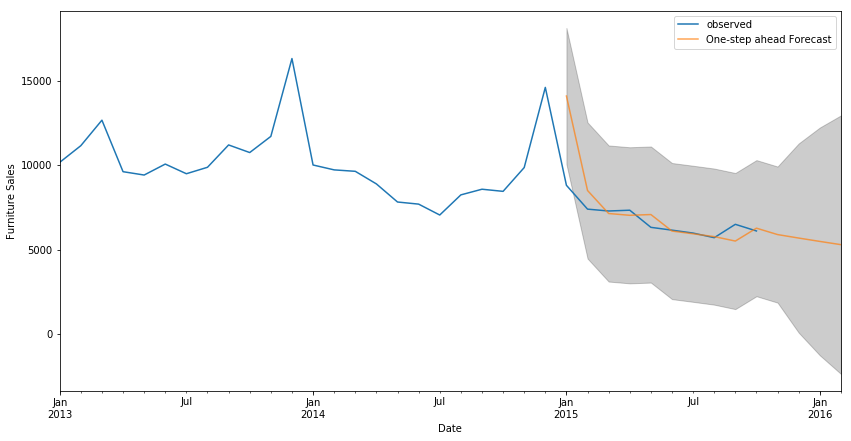

In [84]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'),
                              end=pd.to_datetime('2016-02-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = shop1.shop1['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

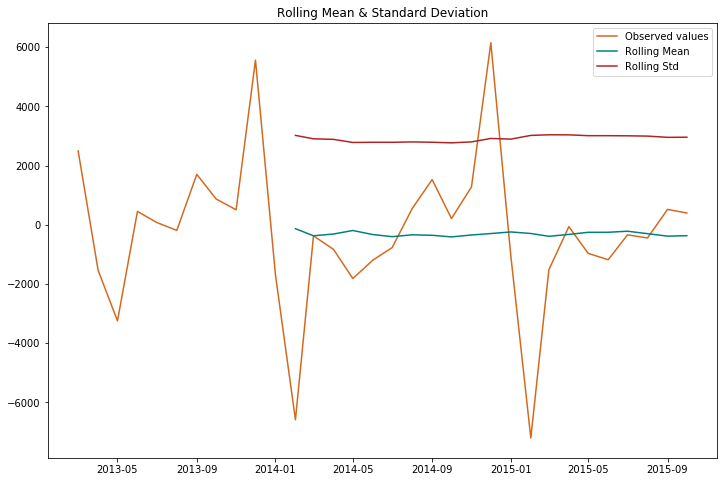

Results of Dickey-Fuller Test:
p-value = 5.6892299173383024e-30. The series is likely stationary.
Test Statistic                -1.729302e+01
p-value                        5.689230e-30
#Lags Used                     9.000000e+00
Number of Observations Used    2.200000e+01
Critical Value 1%             -3.769733e+00
Critical Value 5%             -3.005426e+00
Critical Value 10%            -2.642501e+00
dtype: float64


In [47]:
import numpy as np
#check = shop.shop1.apply(lambda x: np.log(x))

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.01):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='chocolate',label='Observed values')
    mean = plt.plot(rolmean, color='teal', label='Rolling Mean')
    std = plt.plot(rolstd, color='firebrick', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value {key}'] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print(f'p-value = {pvalue}. The series is likely stationary.')
    else:
        print(f'p-value = {pvalue}. The series is likely non-stationary.')
    
    print(dfoutput)

first_diff = shop1.shop1 - shop1.shop1.shift(2)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

In [536]:
bestparams(first_diff)

AICs range from 588.1595384315627 to 597.5487540604406
The best parameters,
in the format [(pdq),(seasonal pdq), AIC ]
with the lowest AIC, are: [(1, 0, 1), (0, 0, 0, 12), 588.1595384315627].


In [96]:
mod2 = sm.tsa.statespace.SARIMAX(first_diff,
                                order=(1, 0, 1),
                                seasonal_order=(0, 0, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod2.fit()

In [97]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

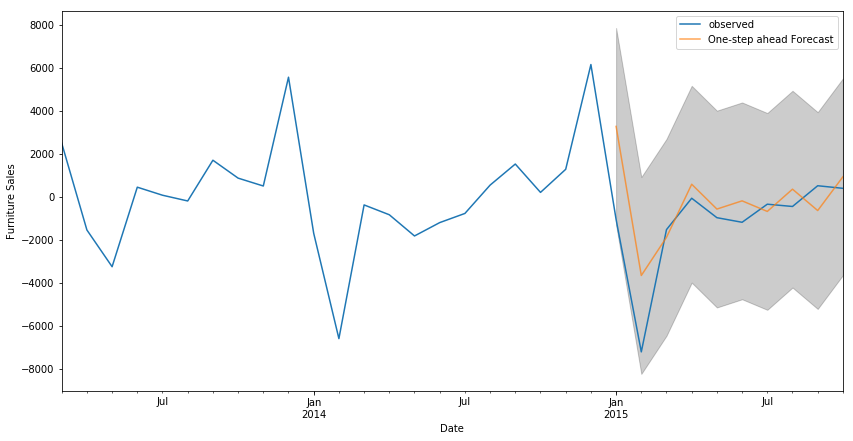

In [98]:
ax = first_diff['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = shop1.shop1['2015-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

In [67]:
pred_ci.iloc[:, 0]

2015-11-01    1869.694385
2015-12-01      93.487991
2016-01-01   -1246.407384
2016-02-01   -2349.475000
2016-03-01   -3294.976579
2016-04-01   -4124.620727
Freq: MS, Name: lower shop1, dtype: float64

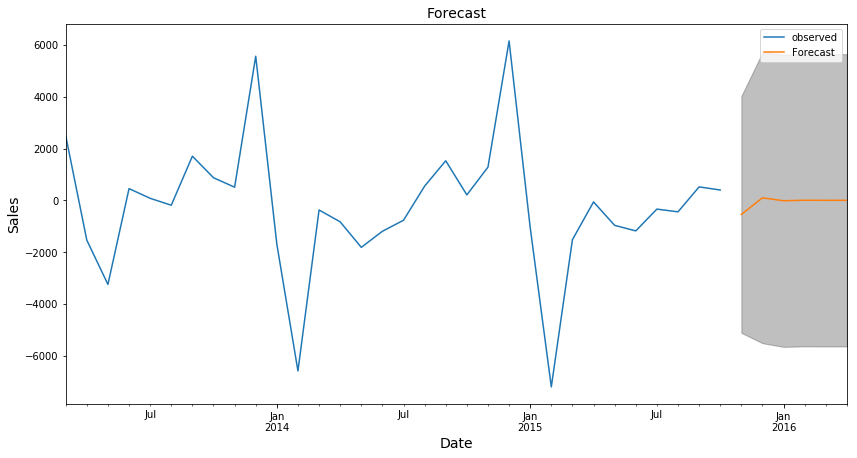

In [104]:
pred_uc = results.get_forecast(steps=6)
pred_ci = pred_uc.conf_int()
y = first_diff
ax = y.plot(label='observed', figsize=(14, 7))
plt.title('Forecast',fontsize=14)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:,1], color='k', alpha=.25)
ax.set_xlabel('Date',fontsize=14)
ax.set_ylabel('Sales',fontsize=14)
plt.legend()
plt.show()

In [441]:
model = ARIMA(history, order=order)
model_fit = model.fit(disp=-1)
predictions_f_ms = model_fit.forecast(steps=len(test))[0]
    predictions_p_ms = model_fit.predict(start=len(history), end=len(history)+len(test)-1)

IndentationError: unexpected indent (<ipython-input-441-5ff6d4aef530>, line 2)

In [2]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm


modAR = sm.tsa.ARIMA(shop1.shop1,order=(1, 0, 0))

NameError: name 'shop1' is not defined

In [ ]:
results_ARIMA = modAR.fit()
results_ARIMA.summary()

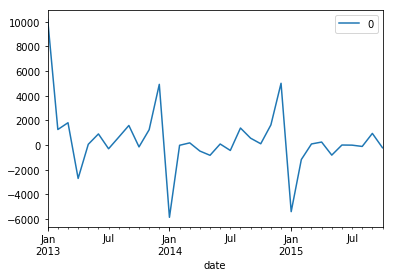

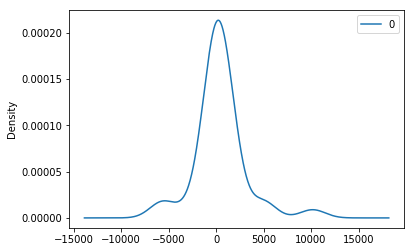

                  0
count     34.000000
mean     422.019950
std     2680.181159
min    -5859.839655
25%     -279.060132
50%       88.373025
75%     1171.422161
max    10173.000000


In [295]:
residuals = pd.DataFrame(model2_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())

In [ ]:
# comparaison
#pd.DataFrame({'test':tes,'pred':pred}).plot();plt.show()

In [496]:
# SARIMAX pour total shops by months

In [502]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(date_sales,order=param,seasonal_order=param_seasonal,
                                        enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:861.9269879437136


# Viz

In [552]:
# plot
x = sales_train.loc[sales_train.shop_id == 31]
plt.figure(figsize=(25,15))
ax= sns.barplot(x.item_id, x.shop_id,palette='Set2')
plt.title("Items per Category",fontsize=24)
plt.ylabel('Numbers of items', fontsize=20)
plt.xlabel('Categories', fontsize=20)
plt.show()

KeyboardInterrupt: 

<Figure size 1800x1080 with 0 Axes>

In [4]:
shop31 = sales_train.loc[sales_train.shop_id == 31]
shop31.date = pd.to_datetime(shop31.date)

/Users/Eleonore/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
shop31['profit'] = shop31.item_price * shop31.item_cnt_day

/Users/Eleonore/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
shop31.columns

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'profit'],
      dtype='object')

In [8]:
shop31_pred = pd.DataFrame(shop31[['date','profit']])
shop31_pred.head()

,date,profit
60143,2013-03-01,3588.0
60144,2013-02-01,1789.0
60145,2013-11-01,799.0
60146,2013-01-26,1499.0
60147,2013-01-25,1499.0


In [21]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [17]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')


def pdqseasonalpqd():
    p = d = q = range(0, 2)
    pdq=list(itertools.product(p, d, q))
    
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
    return pdq, seasonal_pdq

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(shop31_pred.profit,order=param,seasonal_order=param_seasonal,
                                        enforce_stationarity=False,enforce_invertibility=False)
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:4724247.217040113
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4722005.131413458
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4863035.362239015
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4720737.162003128
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4721764.730183717
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4715874.002845027
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4799628.88670162
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4719851.785904333
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4707894.538065534
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4706557.748614858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4852835.788916379


# ARMA

In [74]:
import statsmodels.tsa.api as smt

# pick best order by aic 
# smallest aic value wins
best_aic = np.inf 
best_order = None
best_mdl = None

rng = range(5)
for i in rng:
    for j in rng:
        try:
            tmp_mdl = smt.ARMA(shop1.shop1, order=(i, j)).fit(method='mle', trend='nc')
            tmp_aic = tmp_mdl.aic
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, j)
                best_mdl = tmp_mdl
        except: continue


print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 620.57542 | order: (1, 1)


In [76]:
model_arma = sm.tsa.ARMA(shop1.shop1, (1,1)).fit()

In [77]:
print(model_arma.summary())

                              ARMA Model Results                              
Dep. Variable:                  shop1   No. Observations:                   34
Model:                     ARMA(1, 1)   Log Likelihood                -304.372
Method:                       css-mle   S.D. of innovations           1855.108
Date:                Fri, 12 Jul 2019   AIC                            616.745
Time:                        09:32:48   BIC                            622.850
Sample:                    01-01-2013   HQIC                           618.827
                         - 10-01-2015                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9025.7503    913.292      9.883      0.000    7235.730    1.08e+04
ar.L1.shop1     0.7420      0.196      3.780      0.001       0.357       1.127
ma.L1.shop1    -0.2075      0.287     -0.722    

In [85]:
shop1

shop_id,date,shop1
2013-01-01,2013-01-01,10173.0
2013-02-01,2013-02-01,11160.0
2013-03-01,2013-03-01,12670.0
2013-04-01,2013-04-01,9621.0
2013-05-01,2013-05-01,9423.0
2013-06-01,2013-06-01,10072.0
2013-07-01,2013-07-01,9500.0
2013-08-01,2013-08-01,9882.0
2013-09-01,2013-09-01,11204.0
2013-10-01,2013-10-01,10754.0
